In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
housing = fetch_california_housing()

# Dataset characteristics

### Number of instances

20640

### Attribute information

MedInc HouseAge AveRooms AveBdrms population block population house occupancy latitde longitude

### Target

The target variable is the median house value in units of 100 000 for california districts

# Documentation

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
x_train.shape

(11610, 8)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])
#keras.Layers.Dense(30, activation = "relu"), input_shape = x_train.shape(1:)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ['mae']
             )

In [13]:
model_history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7414 - val_mae: 0.6560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6221 - val_mae: 0.5870
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5779 - val_mae: 0.5550
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5572 - val_mae: 0.5496
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.5305 - val_mae: 0.5319
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.5113 - val_mae: 0.5224
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4974 - val_mae: 0.5151
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [14]:
mae_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 833us/step - loss: 0.3993 - mae: 0.4595


In [15]:
model_history.history

{'loss': [1.8866394758224487,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191967964172,
  0.5271905660629272,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779937505722046,
  0.4474470019340515,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.3979603350162506],
 'mae': [0.9900256991386414,
  0.6041510105133057,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262074947357,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.4636021554470062,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7413728833198547,
  0.6220595240592957,
  0.5779173374176025,
  0.55718696117401

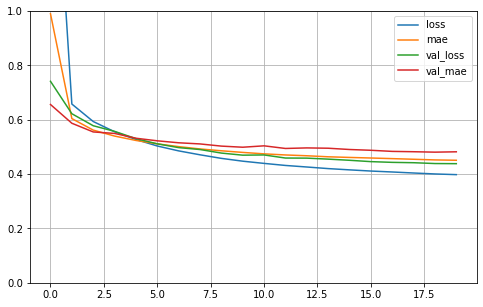

In [16]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
del model

In [18]:
keras.backend.clear_session()

# Functional API

Not all neural networks are simply sequential, some may have complex topologies. some may have multiple inputs and/ or multiple outputs. for example, a wide and deep neural network connects all or part of the input to the output.

In [19]:
input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs = [output])

In [20]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [21]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ['mae'])

In [22]:
model_history = model.fit(x_train, y_train, epochs = 40, validation_data = (x_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.7316 - val_mae: 0.6088
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6670 - val_mae: 0.5999
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.6248 - val_mae: 0.5768
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5963 - val_mae: 0.5662
Epoch 5/40
363/363 [==============================] - 1s 1ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5699 - val_mae: 0.5521
Epoch 6/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.5498 - val_mae: 0.5416
Epoch 7/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.5336 - val_mae: 0.5350
Epoch 8/40
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [23]:
mae_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 837us/step - loss: 0.3903 - mae: 0.4530


In [24]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.6264880895614624,
  0.5877465605735779,
  0.5565561056137085,
  0.5311980843544006,
  0.5107864141464233,
  0.4951668083667755,
  0.48022276163101196,
  0.4684668779373169,
  0.4589638411998749,
  0.45022058486938477,
  0.4432659149169922,
  0.43632543087005615,
  0.43062451481819153,
  0.4253447949886322,
  0.4212932586669922,
  0.41681787371635437,
  0.4126453399658203,
  0.4095856547355652,
  0.4059634804725647,
  0.4029439389705658,
  0.4000455141067505,
  0.3971884548664093,
  0.39462149143218994,
  0.3924905061721802,
  0.3904934823513031,
  0.38845309615135193,
  0.38671207427978516,
  0.38484567403793335,
  0.382953941822052,
  0.38158532977104187,
  0.3805288076400757,
  0.3787027895450592,
  0.3775632083415985,
  0.3763015866279602,
  0.37508344650268555,
  0.37408941984176636,
  0.37281855940818787,
  0.37164586782455444],
 'mae': [0.8892966508865356,
  0.5993583798408508,
  0.577479362487793,
  0.558142364025116,
  0.5

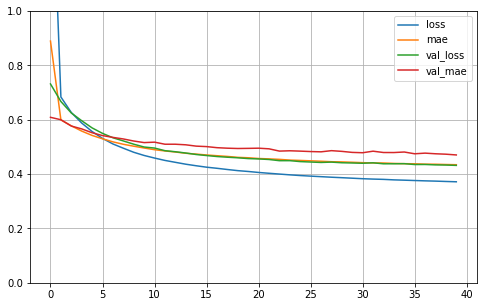

In [25]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Saving and restoring

In [28]:
model.save("natho_model.h5")

In [29]:
%pwd

'C:\\Users\\USER'

In [30]:
del model

In [31]:
keras.backend.clear_session()

In [32]:
model = keras.models.load_model("natho_model.h5")

In [33]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [35]:
y_pred = model.predict(x_new)
print(y_pred)

NameError: name 'x_new' is not defined

# Using Callbacks During Training

In [36]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [38]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

In [39]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [40]:
history = model.fit(x_train, y_train, epochs = 10, 
                   validation_data = (x_valid, y_valid),
                   callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7414
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6221
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5779
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5572
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5272 - val_loss: 0.5305
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.5113
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4854 - val_loss: 0.4974
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4903
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4773
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4696

In [41]:
del model
keras.backend.clear_session()

In [42]:
model = keras.models.load_model("Model-10.h5")

In [43]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 849us/step - loss: 0.4356


# Best Model Only

In [44]:
del model
keras.backend.clear_session()

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [46]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

In [47]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only = True)

In [48]:
history = model.fit(x_train, y_train, epochs = 10, 
                   validation_data = (x_valid, y_valid),
                   callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.4581 - val_loss: 0.8261
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7368 - val_loss: 0.6971
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6516 - val_loss: 0.6317
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5951 - val_loss: 0.5943
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5536 - val_loss: 0.5578
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5199 - val_loss: 0.5338
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4940 - val_loss: 0.5146
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4730 - val_loss: 0.4992
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4563 - val_loss: 0.4867
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4431 - val_loss: 0.4755

In [49]:
model = keras.models.load_model("best_model.h5") #rollback to the best model
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4305


# Best Model Only2

In [50]:
del model
keras.backend.clear_session()

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [52]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only = True)

In [54]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                restore_best_weights = True)
#   Patience: number of epochs with no improvement afte which training will be stopped

In [55]:
history = model.fit(x_train, y_train, epochs = 200, 
                   validation_data = (x_valid, y_valid),
                   callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 2.5780 - val_loss: 1.2794
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 1.0896 - val_loss: 0.8613
Epoch 3/200
363/363 [==============================] - 0s 1ms/step - loss: 0.8430 - val_loss: 0.7575
Epoch 4/200
363/363 [==============================] - 1s 1ms/step - loss: 0.7673 - val_loss: 0.7150
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.7194 - val_loss: 0.6788
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6799 - val_loss: 0.6515
Epoch 7/200
363/363 [==============================] - 1s 1ms/step - loss: 0.6466 - val_loss: 0.6262
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6173 - val_loss: 0.6022
Epoch 9/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5894 - val_loss: 0.5817
Epoch 10/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5645 - val_lo

Epoch 79/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3367 - val_loss: 0.4116
Epoch 80/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3364 - val_loss: 0.4087
Epoch 81/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3358 - val_loss: 0.4083
Epoch 82/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3355 - val_loss: 0.4071
Epoch 83/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3352 - val_loss: 0.4079
Epoch 84/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3346 - val_loss: 0.4087
Epoch 85/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3343 - val_loss: 0.4105
Epoch 86/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3341 - val_loss: 0.4076
Epoch 87/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3336 - val_loss: 0.4092
Epoch 88/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3331

In [56]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3676
